/tmp/ipykernel_4011360/789881908.py:35: RuntimeWarning: divide by zero encountered in log10
  log_hist = np.log10(hist)
/home/jomueller/micromamba/envs/ml/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


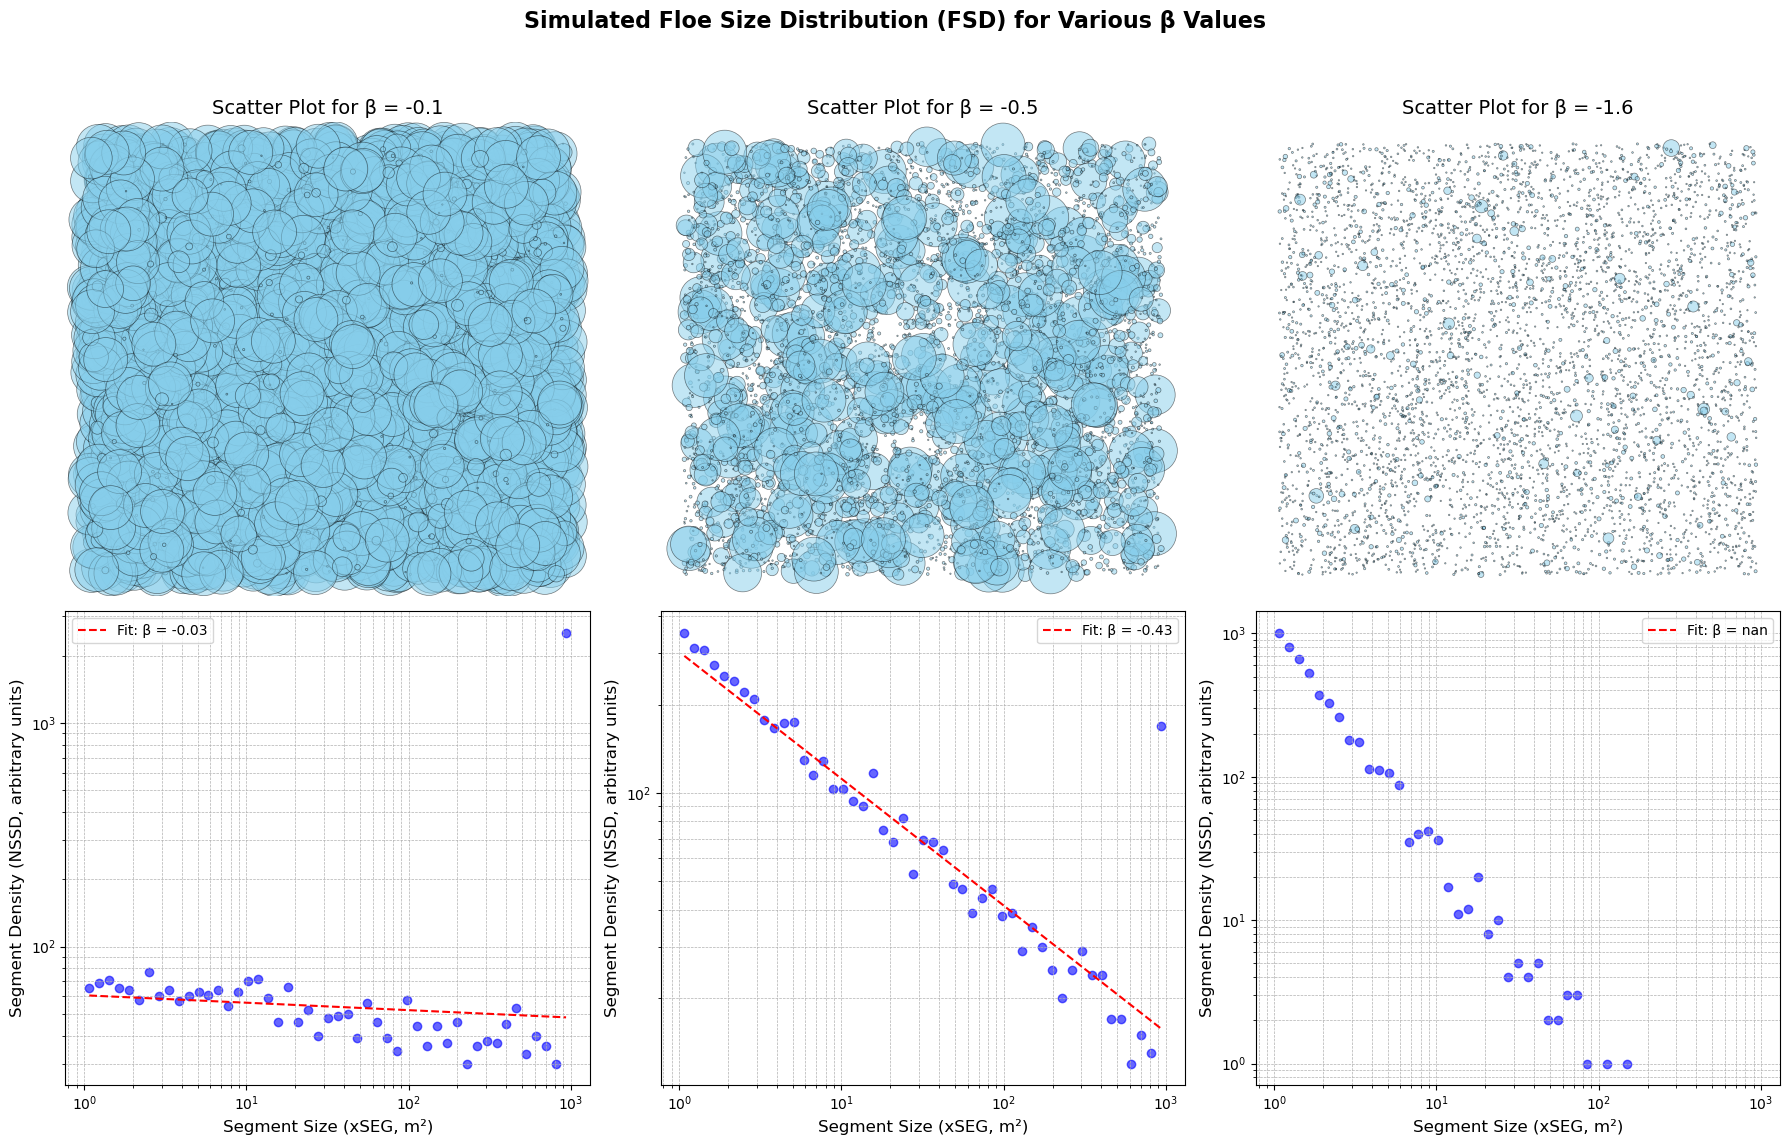

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to generate segment sizes based on power-law exponent β
def generate_segments(num_segments, beta, min_size, max_size):
    sizes = (np.random.pareto(-beta, num_segments) + 1) * min_size
    sizes = np.clip(sizes, min_size, max_size)  # Limit segment sizes
    return sizes

# Panel plot setup for multiple scenarios
def plot_fsd_panel(betas, num_segments=5000, min_size=1, max_size=1000):
    fig, axs = plt.subplots(2, len(betas), figsize=(18, 12), gridspec_kw={'height_ratios': [1, 1]})
    fig.suptitle("Simulated Floe Size Distribution (FSD) for Various β Values", fontsize=16, fontweight='bold')
    
    # Iterate over each beta value and create plots
    for i, beta in enumerate(betas):
        # Generate segment sizes based on given β
        segment_sizes = generate_segments(num_segments, beta, min_size, max_size)
        
        # 2D Scatter plot of segments
        axs[0, i].scatter(
            np.random.rand(num_segments) * 100, 
            np.random.rand(num_segments) * 100,
            s=segment_sizes ,  # Scale down sizes for visibility
            color="skyblue", alpha=0.5, edgecolor="black", linewidth=0.5
        )
        axs[0, i].set_title(f"Scatter Plot for β = {beta}", fontsize=14)
        axs[0, i].axis("off")

        # Double-logarithmic plot for segment size density
        hist, bin_edges = np.histogram(segment_sizes, bins=np.logspace(np.log10(min_size), np.log10(max_size), 50))
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        log_bin_centers = np.log10(bin_centers)
        log_hist = np.log10(hist)
        #log_hist = np.log10(hist + 1e-10)  # Adding small value to avoid log(0)
        
        # Calculate and plot β
        slope, intercept, _, _, _ = linregress(log_bin_centers, log_hist)
        axs[1, i].plot(bin_centers, 10**(slope * log_bin_centers + intercept), color="red", linestyle="--", label=f"Fit: β = {slope:.2f}")
        axs[1, i].scatter(bin_centers, hist, color="blue", alpha=0.6)
        axs[1, i].set_xscale("log")
        axs[1, i].set_yscale("log")
        axs[1, i].set_xlabel("Segment Size (xSEG, m²)", fontsize=12)
        axs[1, i].set_ylabel("Segment Density (NSSD, arbitrary units)", fontsize=12)
        axs[1, i].legend()
        axs[1, i].grid(True, which="both", linestyle="--", linewidth=0.5)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Define a range of β values to simulate
betas = [-0.1, -.5, -1.6]

# Run the panel plot for all β values
plot_fsd_panel(betas)


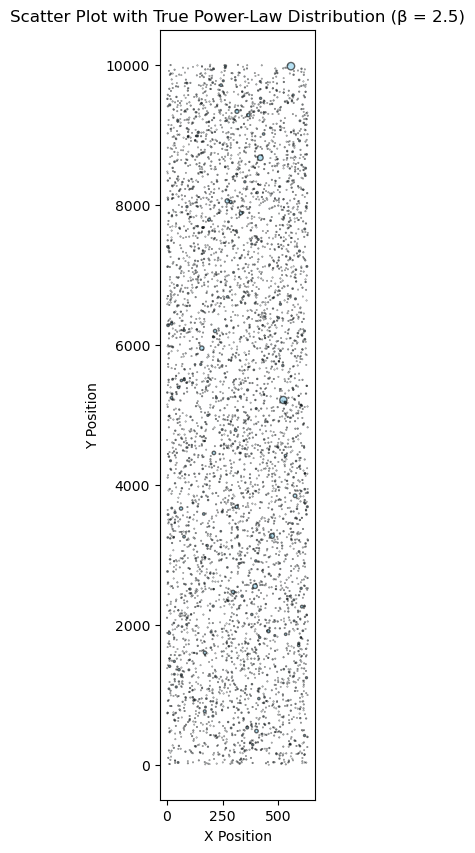

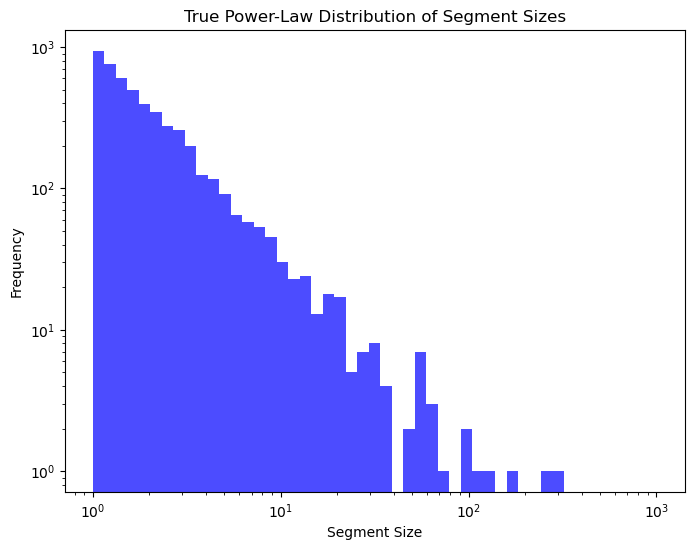

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_points = 5000
beta = 2.5  # True power-law exponent (positive, e.g., β = 2.5 corresponds to P(x) ∝ x^-2.5)
min_size, max_size = 1, 1000

# Generate segment sizes with true power-law distribution
def generate_power_law_samples(num_points, beta, min_size, max_size):
    r = np.random.uniform(0, 1, num_points)
    sizes = min_size * (1 - r)**(-1 / (beta - 1))
    sizes = np.clip(sizes, min_size, max_size)  # Limit segment sizes to max_size
    return sizes

# Generate segment sizes
sizes = generate_power_law_samples(num_points, beta, min_size, max_size)

# Scatter plot to visualize the distribution
x_positions = np.random.rand(num_points) * 635
y_positions = np.random.rand(num_points) * 10000

plt.figure(figsize=(2, 10))
plt.scatter(x_positions, y_positions, s=sizes / 10, alpha=0.6, color="skyblue", edgecolor="black")
plt.title(f"Scatter Plot with True Power-Law Distribution (β = {beta})")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()

# Double-logarithmic plot of the size distribution to check scaling
plt.figure(figsize=(8, 6))
plt.hist(sizes, bins=np.logspace(np.log10(min_size), np.log10(max_size), 50), color="blue", alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Segment Size")
plt.ylabel("Frequency")
plt.title("True Power-Law Distribution of Segment Sizes")
plt.show()


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Function to generate true power-law distributed sizes
def generate_power_law_samples(num_points, beta, min_size, max_size):
    r = np.random.uniform(0, 1, num_points)
    sizes = min_size * (1 - r)**(beta)
    sizes = np.clip(sizes, min_size, max_size)  # Limit segment sizes to max_size
    return sizes


from mpl_toolkits.axes_grid1 import  inset_locator

# Panel plot setup for multiple scenarios
def plot_fsd_panel(betas, num_points, min_size, max_size):

    for i, beta in enumerate(betas):
        fig, ax = plt.subplots(1, figsize=(16, 9))
        # Generate power-law segment sizes
        sizes = generate_power_law_samples(num_points, beta, min_size, max_size)
        
        # add an inset with a small plot to display the histogram

        ax_inset = inset_locator.inset_axes(ax, width="30%", height="30%", bbox_to_anchor=(-.63, -.63, 1, 1), bbox_transform=ax.transAxes)

        # Scatter plot positions
        x_positions = np.random.rand(num_points) * 100
        y_positions = np.random.rand(num_points) * 100

        # Scatter plot of segments
        ax.scatter(x_positions, y_positions, s=sizes / 5, alpha=0.5, color="skyblue", edgecolor="black", linewidth=0.5)
        ax.set_title(f"Scatter Plot for β = {beta:.2f}", fontsize=14)
        ax.axis("off")

        # Double-logarithmic plot of the size distribution
        hist, bin_edges = np.histogram(sizes, bins=np.logspace(np.log10(min_size), np.log10(max_size), 50))
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        log_bin_centers = np.log10(bin_centers)
        log_hist = np.log10(hist + 1e-10)  # Adding small value to avoid log(0)

        # Calculate β from the simulation
        slope, intercept, _, _, _ = linregress(log_bin_centers, log_hist)
        
        # Plotting the fit line and histogram
        ax_inset.plot(bin_centers, 10**(slope * log_bin_centers + intercept), color="red", linestyle="--", label=f"Fit: β = -{abs(1/slope):.2f}")
        ax_inset.scatter(bin_centers, hist, alpha=0.6)
        ax_inset.set_xscale("log")
        ax_inset.set_yscale("log")
        ax_inset.legend(loc='upper right')
        ax_inset.grid(True, which="both", linestyle="--", linewidth=0.5)

        ax_inset.set_xlabel("$x_\mathrm{seg}$", fontsize=12)
        ax_inset.set_ylabel("$N_\mathrm{SSD}$", fontsize=12)
        ax_inset.set_xticks([1, 10, 100, 1000])
        ax_inset.set_yticks([1, 10, 100, 1000])

        plt.savefig(f'../../plots/ani/floesize/{i}.png', dpi=400)
        plt.close()
# Run the panel plot for all β values

# Parameters
np.random.seed(12)
num_points = 10000  # Increased number of points for denser plot
betas = np.linspace(-1, -2, 100)
min_size, max_size = 1, 1000

plot_fsd_panel(betas, num_points, min_size, max_size)
#plt.savefig('../../plots/idealized_ssd.png', dpi=600)
